<a href="https://colab.research.google.com/github/imadegunawinangun/NLP-Desi---Deteksi-Emosi/blob/main/Desi_Detektor_Emosi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [127]:
from google.colab import drive
#drive.mount('/content/drive')

In [128]:
!git clone https://github.com/imadegunawinangun/NLP-Desi---Deteksi-Emosi

fatal: destination path 'NLP-Desi---Deteksi-Emosi' already exists and is not an empty directory.


In [129]:
!ls NLP-Desi---Deteksi-Emosi

archive.zip  data.txt			imdb_indonesian_movies_2.csv  test.txt
data.csv     Desi_Detektor_Emosi.ipynb	LICENSE


In [130]:
import pandas as pd
import os
import numpy as np


In [131]:
read_file = pd.read_csv (r'NLP-Desi---Deteksi-Emosi/data.txt',error_bad_lines=False,sep=';')
read_file.to_csv ('NLP-Desi---Deteksi-Emosi/data.csv', index=None)

b'Skipping line 144: expected 2 fields, saw 3\nSkipping line 163: expected 2 fields, saw 3\nSkipping line 460: expected 2 fields, saw 3\nSkipping line 496: expected 2 fields, saw 3\nSkipping line 541: expected 2 fields, saw 3\nSkipping line 557: expected 2 fields, saw 3\nSkipping line 697: expected 2 fields, saw 3\nSkipping line 882: expected 2 fields, saw 3\nSkipping line 890: expected 2 fields, saw 3\nSkipping line 908: expected 2 fields, saw 3\nSkipping line 911: expected 2 fields, saw 3\nSkipping line 1037: expected 2 fields, saw 3\nSkipping line 1070: expected 2 fields, saw 3\nSkipping line 1173: expected 2 fields, saw 3\nSkipping line 1193: expected 2 fields, saw 3\nSkipping line 1197: expected 2 fields, saw 3\nSkipping line 1317: expected 2 fields, saw 3\nSkipping line 1698: expected 2 fields, saw 3\nSkipping line 1716: expected 2 fields, saw 3\nSkipping line 1874: expected 2 fields, saw 3\nSkipping line 2188: expected 2 fields, saw 3\nSkipping line 2228: expected 2 fields, saw 

In [132]:
datadir = 'NLP-Desi---Deteksi-Emosi/'
columns = ['kalimat', 'emosi']
data = pd.read_csv(os.path.join(datadir, 'data.csv'), names = columns)
#data['emosi']=data['emosi'].astype("category")
pd.set_option('display.max_colwidth', -1)
data

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  """


,kalimat,emosi
0,saya tidak merasa terhina,kesedihan
1,saya bisa berubah dari merasa sangat putus asa menjadi sangat berharap hanya dari berada di sekitar seseorang yang peduli dan terjaga,kesedihan
2,saya mengambil waktu sebentar untuk memposting saya merasa serakah salah,kemarahan
3,saya pernah merasa nostalgia tentang perapian saya akan tahu bahwa itu masih di properti,cinta
4,saya merasa kesal,kemarahan
...,...,...
15853,saya hanya memiliki waktu yang sangat singkat di beanbag dan saya berkata kepada anna bahwa saya merasa seperti saya telah dipukuli,kesedihan
15854,saya sekarang berbalik dan saya merasa menyedihkan bahwa saya masih menunggu meja dan subbing dengan gelar mengajar,kesedihan
15855,saya merasa kuat dan baik secara keseluruhan,kegembiraan
15856,Saya merasa ini adalah komentar yang kasar dan saya senang bahwa t,kemarahan


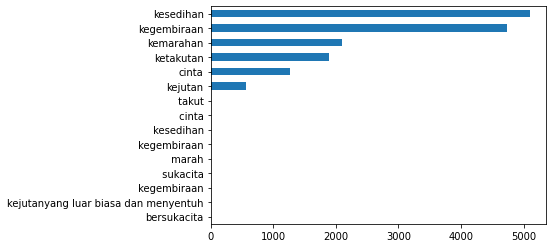

In [133]:
data.emosi.value_counts().sort_values().plot(kind = 'barh')

In [134]:
from sklearn.utils import shuffle

def data_balancing(data, samples_per_bin ):
  print('total data:', len(data))
  remove_list = []
  for j in range(1):
    list_ = []
    for i in range(len(data)):
      list_.append(i)

    list_ = shuffle(list_)
    list_ = list_[samples_per_bin:]
    remove_list.extend(list_)
  list_ = []
  list_.append(data)
  list_ = shuffle(list_)
  list_ = list_[samples_per_bin:]
  remove_list.extend(list_)
  print('removed:', len(remove_list))
  data_=data.copy()
  data_.drop(data_.index[remove_list], inplace=True)
  print('remaining:', len(data_))
  return data_

total data: 5094
removed: 3094
remaining: 2000
total data: 4739
removed: 2739
remaining: 2000
total data: 2096
removed: 96
remaining: 2000


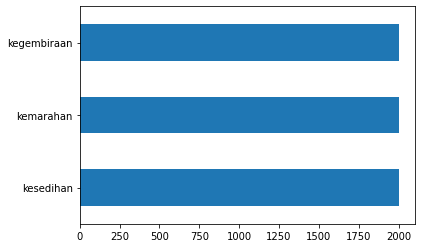

In [135]:
data.loc[data['emosi'] == 'kejutan']
df = pd.concat([data_balancing(data.loc[data['emosi'] == 'kesedihan'],2000), 
                data_balancing(data.loc[data['emosi'] == 'kegembiraan'],2000),
                data_balancing(data.loc[data['emosi'] == 'kemarahan'],2000)
                ], 
               sort=True)
df['emosi']=df['emosi'].astype("category")
df.emosi.value_counts().plot(kind = 'barh')


In [136]:
category = pd.get_dummies(df.emosi)
df_baru = pd.concat([df, category], axis=1)
df_baru = df_baru.drop(columns='emosi')
df_baru

,kalimat,kegembiraan,kemarahan,kesedihan
1,saya bisa berubah dari merasa sangat putus asa menjadi sangat berharap hanya dari berada di sekitar seseorang yang peduli dan terjaga,0,0,1
5,Saya merasa sedikit terbebani akhir-akhir ini tidak yakin mengapa itu,0,0,1
27,saya menjadi kewalahan dan merasa kalah,0,0,1
40,saya berencana untuk berbagi cerita kehidupan sehari-hari saya inspirasi petualangan perjalanan dan kreasi buatan tangan dengan Anda dan berharap Anda juga akan merasa terinspirasi,0,0,1
51,saya menemukan diri saya merasa sedikit putus asa pagi itu,0,0,1
...,...,...,...,...
15825,saya punya perasaan saya akan menjadi tak berperasaan,0,1,0
15835,Saya sering merasa diri saya tersinggung ketika saya mendengar orang-orang yang saya yakini sebagai orang-orang brilian mengikuti apa yang saya anggap takhayul aneh dan ritual aneh,0,1,0
15840,saya meluangkan waktu sejenak untuk menghargai pepohonan di sekitar saya dan energi menenangkan yang mereka berikan kepada saya pada saat saya merasa sedikit mudah tersinggung,0,1,0
15850,saya pindah dia mengatakan sesuatu yang membuat saya merasa kasar tetapi itu adalah sesuatu yang saya masih tidak bisa mengerti,0,1,0


In [137]:
def separate_data_label(df):
  teks = []
  label = []
  for i in range(len(df)):
    indexed_data = df.iloc[i]
    teks.append(indexed_data[0])
    label.append(indexed_data[1:6] )
  data_teks = np.asarray(teks)
  label_teks = np.asarray(label)
  return   data_teks , label_teks
 
data_teks, label_teks = load_img_steering(df_baru)


In [138]:
label_teks = np.array(label_teks, dtype=np.int32)
label_teks

array([[0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       ...,
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0]], dtype=int32)

In [139]:
label_teks.shape

(6000, 3)

In [140]:
from sklearn.model_selection import train_test_split

kalimat_latih, kalimat_test, y_latih, y_test = train_test_split(data_teks, label_teks, test_size=0.2)

In [141]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
num_words = 10000
tokenizer = Tokenizer(num_words, oov_token='*')
tokenizer.fit_on_texts(kalimat_latih) 
tokenizer.fit_on_texts(kalimat_test)
 
x_train_tokens = tokenizer.texts_to_sequences(kalimat_latih)
x_valid_tokens = tokenizer.texts_to_sequences(kalimat_test)

x_train_padded = pad_sequences(x_train_tokens) 
x_valid_padded = pad_sequences(x_valid_tokens)


In [142]:
num_tokens = [len(tokens) for tokens in x_train_tokens + x_valid_tokens]
num_tokens = np.array(num_tokens)

In [143]:
np.mean(num_tokens)

17.3715

In [144]:
np.max(num_tokens)

63

In [145]:
max_tokens = np.mean(num_tokens) + 2 * np.std(num_tokens)
max_tokens = int(max_tokens)
max_tokens

37

In [146]:
np.sum(num_tokens < max_tokens) / len(num_tokens)

0.9436666666666667

In [147]:
print(kalimat_latih[0])
print(np.array(x_train_tokens[0]))
print(np.array(x_train_padded[0]))
print(np.array(tokenizer.sequences_to_texts(x_train_padded)[0]))

saya merasa agak kesepian tanpa komentar untuk menanggapi c
[   2    3   85  316  130  551    7 1611 1906]
[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    2    3
   85  316  130  551    7 1611 1906]
* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * saya merasa agak kesepian tanpa komentar untuk menanggapi c


In [148]:
pip install -q -U keras-tuner


In [149]:
import kerastuner.tuners as kt


In [185]:
import tensorflow as tf

def model_rnn1(hp):
  model = tf.keras.Sequential()
  model.add(tf.keras.layers.Embedding(num_words, hp.Int("Output Embed",min_value= 64, max_value = 256, step= 64), input_length=max_tokens,name='layer_embedding'))
  model.add(tf.keras.layers.LSTM(hp.Int("LSTM",min_value= 64, max_value = 256, step= 64)))

  for i in range(hp.Int("Dense Layers", min_value=1, max_value=3)):
      model.add(tf.keras.layers.Dense(hp.Int(f"Dense_{i}_layer", min_value= 64, max_value = 256, step= 64), 
                                   activation='relu'))

  model.add(tf.keras.layers.Dense(3, activation='softmax'))
  model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(hp.Choice(f"learning_rate", [ 3e-4,1e-3])),metrics=['accuracy'])
  return model
def model_rnn():
  model = tf.keras.Sequential()
  model.add(tf.keras.layers.Embedding(num_words, 192, input_length=max_tokens,name='layer_embedding'))
  model.add(tf.keras.layers.LSTM(128))
  model.add(tf.keras.layers.Dense(64, activation='relu'))
  model.add(tf.keras.layers.Dense(128, activation='relu'))


  model.add(tf.keras.layers.Dense(3, activation='softmax'))
  model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(1e-3),metrics=['accuracy'])
  return model


In [158]:
class myCallback(tf.keras.callbacks.Callback):

  def on_epoch_end(self, epoch, logs={}):

    if(logs.get('accuracy') > 0.90 and logs.get('val_accuracy') > 0.90 ):  


      print("\nAkurasi telah mencapai >90%!")

      self.model.stop_training = True

callbacks90 = myCallback()

In [182]:
class MyTuner(kt.RandomSearch):
  def run_trial(self, trial, *args, **kwargs):
    # You can add additional HyperParameters for preprocessing and custom training loops
    # via overriding `run_trial`

    super(MyTuner, self).run_trial(trial, *args, **kwargs)

# Uses same arguments as the BayesianOptimization Tuner.
tuner = MyTuner(model_rnn1,
                objective='val_accuracy',
                max_trials=1000,)
# Don't pass epochs or batch_size here, let the Tuner tune them.

tuner.search(
    x_train_padded, y_latih,
        validation_split=0.2,
            epochs=50,
             steps_per_epoch = 500,
            callbacks=[
              tf.keras.callbacks.EarlyStopping(
              monitor='val_accuracy',
              patience=5,
              ),callbacks90
              ]
             )

INFO:tensorflow:Reloading Oracle from existing project ./untitled_project/oracle.json
INFO:tensorflow:Reloading Tuner from ./untitled_project/tuner0.json

Search: Running Trial #1

Hyperparameter    |Value             |Best Value So Far 
Output Embed      |128               |192               
LSTM              |128               |128               
Dense Layers      |2                 |2                 
Dense_0_layer     |256               |64                
learning_rate     |0.001             |0.001             
Dense_1_layer     |128               |128               
Dense_2_layer     |192               |192               

Epoch 1/50
430/500 [========================>.....] - ETA: 1s - loss: 0.9655 - accuracy: 0.5061

KeyboardInterrupt: ignored

In [190]:
model = model_rnn()
num_epochs = 30
history = model.fit(
    x_train_padded, y_latih,
        validation_split=0.2,
            epochs=50,
            callbacks=[
              tf.keras.callbacks.EarlyStopping(
              monitor='val_accuracy',
              patience=3,
                                      restore_best_weights=True

              ),callbacks90
              ]
             )


Epoch 1/50
120/120 [==============================] - 4s 26ms/step - loss: 0.9832 - accuracy: 0.5026 - val_loss: 0.8106 - val_accuracy: 0.6698
Epoch 2/50
120/120 [==============================] - 3s 23ms/step - loss: 0.4823 - accuracy: 0.8221 - val_loss: 0.6670 - val_accuracy: 0.7115
Epoch 3/50
120/120 [==============================] - 3s 23ms/step - loss: 0.2525 - accuracy: 0.9130 - val_loss: 0.7131 - val_accuracy: 0.7667
Epoch 4/50
120/120 [==============================] - 3s 23ms/step - loss: 0.1458 - accuracy: 0.9531 - val_loss: 0.7364 - val_accuracy: 0.7635
Epoch 5/50
120/120 [==============================] - 3s 23ms/step - loss: 0.0935 - accuracy: 0.9703 - val_loss: 0.8998 - val_accuracy: 0.7563
Epoch 6/50
120/120 [==============================] - 3s 23ms/step - loss: 0.0654 - accuracy: 0.9794 - val_loss: 1.0052 - val_accuracy: 0.7635


Text(0.5, 0, 'Epoch')

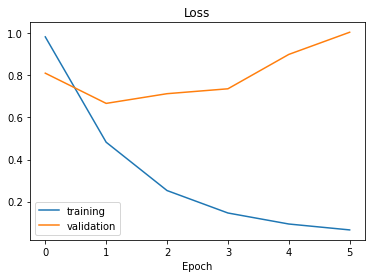

In [191]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training', 'validation'])
plt.title('Loss')
plt.xlabel('Epoch')

Text(0.5, 1.0, 'Accuracy')

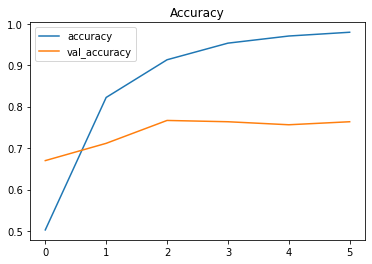

In [192]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend([ 'accuracy', 'val_accuracy'])
plt.title('Accuracy')

In [200]:
print(x_valid_padded[1])
print(np.array(tokenizer.sequences_to_texts(x_valid_padded)[1]))

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   2 103   4 175   8 126 130   3  96 963  33 712]
* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * saya suka dan melakukannya dengan cara tanpa merasa terlalu berlebihan atau sombong


In [199]:
classes = np.argmax(model.predict(x_valid_padded)[1])
print(classes)

if (classes==0):
  print('kegembiraan')
elif (classes==1):
  print('kemarahan')
elif (classes==2):
  print('kesedihan')

0
kegembiraan
